## Porblem Statement

Customer churn is an important metric in any business, it enables a business to identify what are the main reasons that a customer wants to continue to stay with them or use their product in long term and also gives resonas why a customer wants to leave them, so understanding data and patterns that drives customer chirn is very important.

In this case of Bank Customer Churn, I am using a bank data that enbles the prediction of customer churn based on various features related to banking, so the main of this prediction is to create a model that has good precision and accuracy in predicting the churn of customer.

I am using a Logistic Regression model for this analysis, I am trying to Identify the following :

1. Understand the data
2. Clean the Data (Handling missing values, Filtering Outliers)
3. Exploratory Data Analysis (Univariant, Bivariant, Multivariance Analysis)
4. Identify the patterns in data and relation with customer churn
5. Create a logistic regression model
6. Feature Selection
7. Model performance analysis

These are the libraries that are being used in my code. 

In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score, roc_curve

The data that I am using is from kaggle, the link for the data source is provided below:  
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/

In [2]:
data = pd.read_csv("./dataset/bank_churn/Bank Customer Churn Prediction.csv")

The data is in CSv format and is being loded using pandas read_csv method. 

In [3]:
df = pd.DataFrame(data)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Summary

The below cells summarizes the data, it has 10000 rows and 12 columns.

In [527]:
df.shape

(10000, 12)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [529]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [530]:
object_columns = df.dtypes[df.dtypes.values=='object']

In [531]:
print("The categorical columns are : ", ", ".join(list(object_columns.index)))

The categorical columns are :  country, gender


In [532]:
numerical_columns = df.dtypes[~(df.dtypes.values=='object')]

In [533]:
print("The numerical columns are : ", ", ".join(list(numerical_columns.index)))

The numerical columns are :  customer_id, credit_score, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn


## Checking for Null Values

In [534]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

We dont have null values, so we can now proceed to examine the data further

## Explortory Data Analysis

The Featues here are customer_id , credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, stimated_salary.  
The Target variable is churn.  
Let us go through the complete data in the following section and understand the relation between the features and target variable.

In [542]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [536]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

### Plot Settings

In [548]:
def set_color(c):
    sns.set_palette(sns.color_palette(c, 10))
    
def set_size(*size):
    plt.figure(figsize=size)
    
def set_style(s):
    sns.set_style(s)
    
def set_context(c):
    sns.set_context(context=c)

### Univariant Analysis

#### Customer ID

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


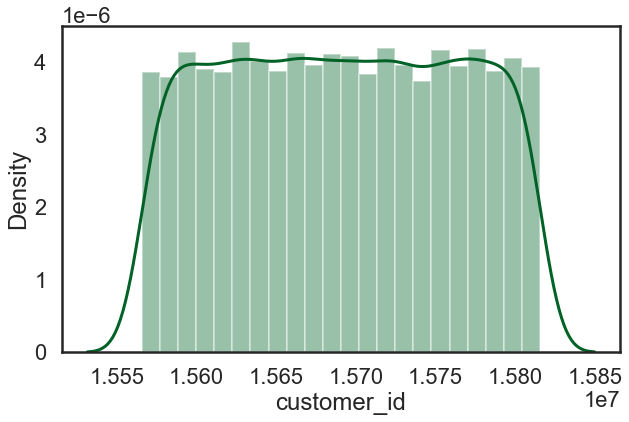

In [538]:
sns.set_style("white")
set_size(10,6)
sns.set_context(context='poster')
set_color("BuGn_r")
sns.distplot(df.customer_id)
plt.show()

Since customer_id is just a number we can remove that column as that does not add any value

In [539]:
df1 = df.drop(['customer_id'], axis=1).copy()

In [540]:
df1.shape

(10000, 11)

#### Credit Score

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


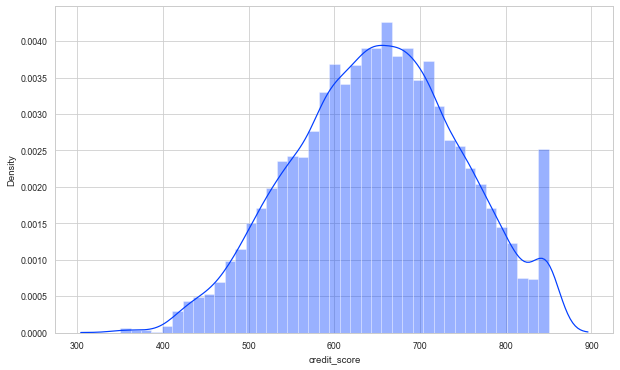

In [541]:
set_style("whitegrid")
set_size(10,6)
set_context("paper")
set_color("bright")
sns.distplot(df1.credit_score)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


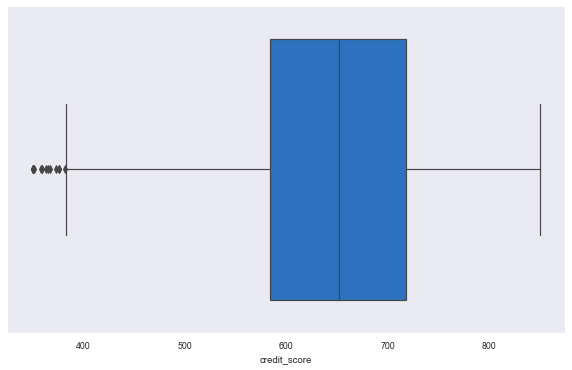

In [19]:
set_style("dark")
set_size(10,6)
set_context("paper")
set_color("terrain")
sns.boxplot(df.credit_score)

We can clearly see that there are outliers in the credit_score data, let us try to remove these outliers.

### Quartile calculation

In [20]:
def quartile_calc(ds):
    q1 = np.percentile(ds, 25)
    q3 = np.percentile(ds, 75)
    iqr = q3 - q1
    
    min_val = q1 - (1.5*iqr)
    max_val = q3 + (1.5*iqr)
    
    return (min_val, max_val)

(9985, 11)


C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


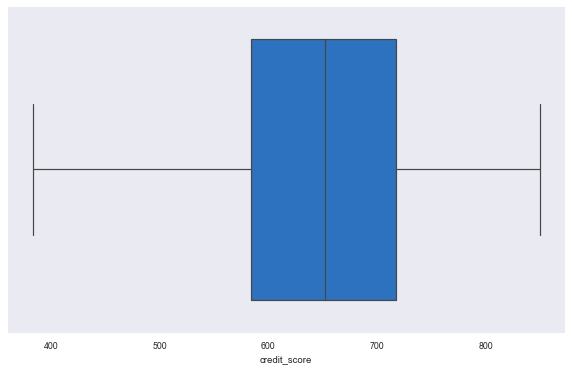

In [21]:
min_val, max_val = quartile_calc(df1.credit_score)

df2 = df1[(df1.credit_score >= min_val) & (df1.credit_score <= max_val)]
print(df2.shape)

set_size(10, 6)
sns.boxplot(df2.credit_score)

Now we have removed these outliers and credit score is clean data

#### Age

In [22]:
df2.age.describe()

count    9985.000000
mean       38.915173
std        10.487483
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: age, dtype: float64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


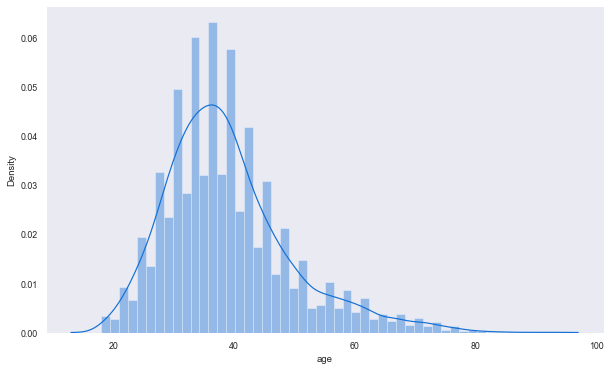

In [23]:
set_size(10,6)
sns.distplot(df2.age)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


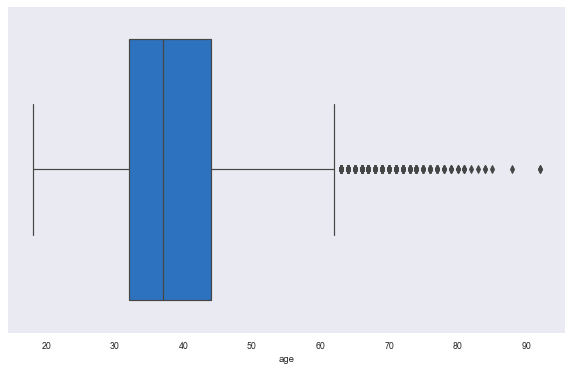

In [24]:
set_size(10, 6)
set_color("terrain")
sns.boxplot(df2.age)

We can see that there are outliers in this data, so let us try to remove these outliers

In [25]:
min_val, max_val = quartile_calc(df2.age)

df3 = df2[(df2.age >= min_val) & (df2.age<=max_val)]

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


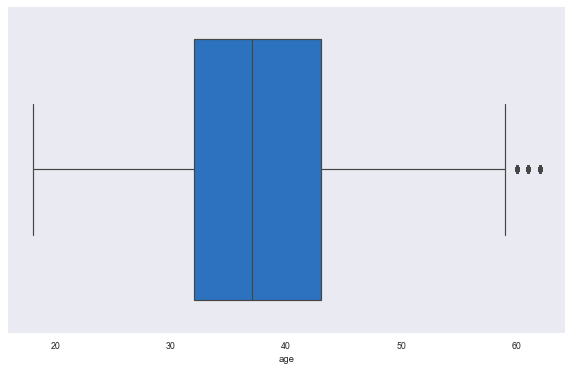

In [26]:
set_size(10, 6)
sns.boxplot(df3.age)

We have removed the outliers using Inter quartile method and can see we have only few outliers left, we can leave this

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


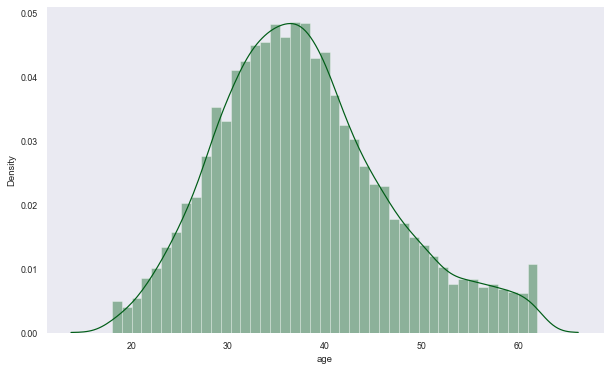

In [27]:
set_size(10,6)
set_color("ocean")
sns.distplot(df3.age)

#### Tenure

In [28]:
df3.tenure.describe()

count    9626.000000
mean        5.016829
std         2.888172
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


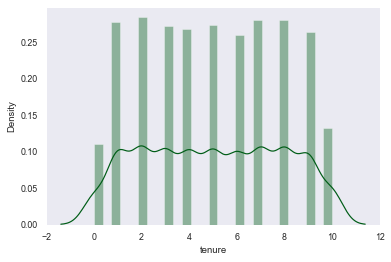

In [29]:
sns.distplot(df3.tenure)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


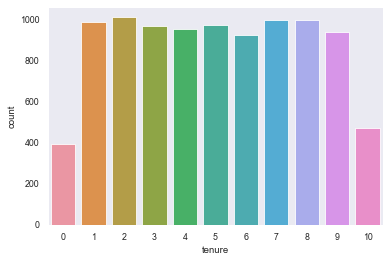

In [30]:
sns.countplot(df3.tenure)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


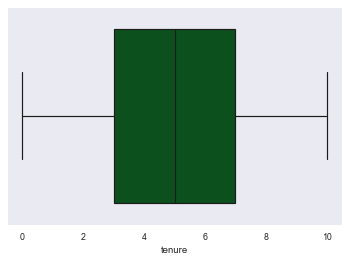

In [31]:
sns.boxplot(df3.tenure)

The tenure column has no outliers, it tells us how many years the customer have an account in the bank. so we can proceed with next column.

#### Balance

In [32]:
df3.balance.describe()

count      9626.000000
mean      76545.811799
std       62399.264935
min           0.000000
25%           0.000000
50%       97277.130000
75%      127647.840000
max      250898.090000
Name: balance, dtype: float64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


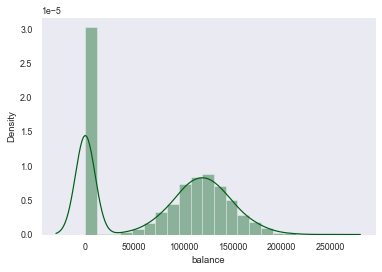

In [33]:
sns.distplot(df3.balance)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


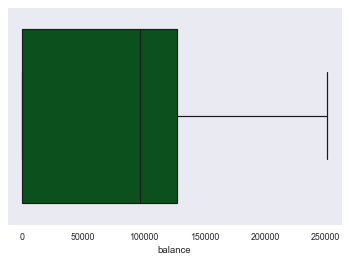

In [34]:
sns.boxplot(df3.balance)

In [35]:
df3.balance[df3.balance==0].shape[0]

3478

We can see that many customers have balance 0, so this is an important term to identify the churn of customers, let us see how churn is dependent on this column in bivariant analysis

#### products_number       

In [36]:
df3.products_number.describe()

count    9626.000000
mean        1.530958
std         0.580844
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: products_number, dtype: float64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


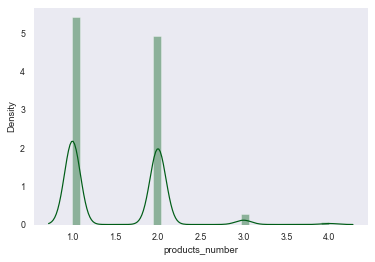

In [37]:
sns.distplot(df3.products_number)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


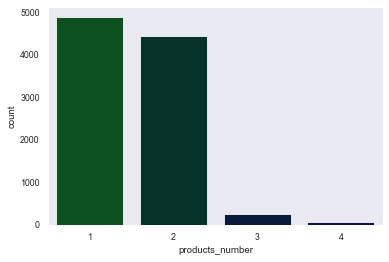

In [38]:
sns.countplot(df3.products_number)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


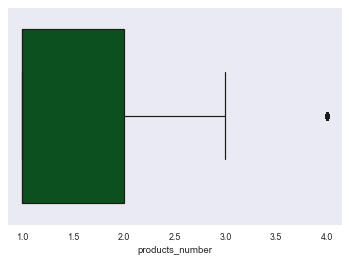

In [39]:
sns.boxplot(df3.products_number)

In [40]:
df3.products_number.value_counts()

1    4882
2    4435
3     251
4      58
Name: products_number, dtype: int64

We can clearly see that the products_number with value 4 occured only 58 times, but let us see if this has any significant imapact on churn and decide to drop it if not necessary in bivariant analysis

#### credit_card

In [41]:
df3.credit_card.describe()

count    9626.000000
mean        0.704966
std         0.456082
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit_card, dtype: float64

In [42]:
df.credit_card.value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


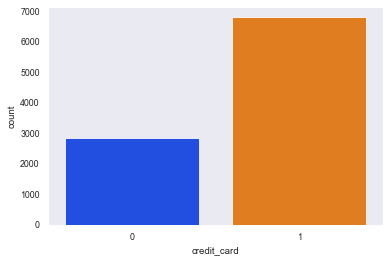

In [43]:
set_color("bright")
sns.countplot(df3.credit_card)

This column does not have any outliers, so let us move to next column

#### Active_member

In [44]:
df.active_member.describe()

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: active_member, dtype: float64

In [45]:
df3.active_member.value_counts()

1    4847
0    4779
Name: active_member, dtype: int64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


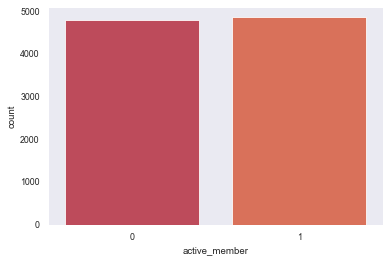

In [46]:
set_color("Spectral")
sns.countplot(df3.active_member)

This column does not have any outliers, so we can proceed to next column

#### estimated_salary

In [47]:
df3.estimated_salary.describe()

count      9626.000000
mean     100113.368207
std       57521.570761
min          11.580000
25%       51012.472500
50%      100185.240000
75%      149414.455000
max      199992.480000
Name: estimated_salary, dtype: float64

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


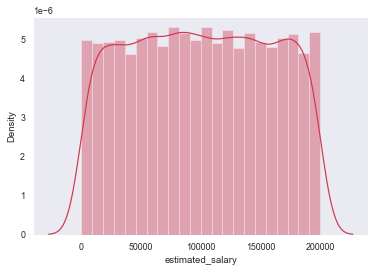

In [48]:
sns.distplot(df3.estimated_salary)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


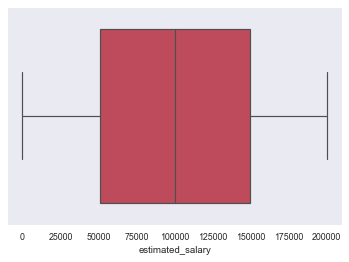

In [49]:
sns.boxplot(df3.estimated_salary)

This column does not have any outliers, let us see how this effects the customer churn

In [50]:
object_columns

country    object
gender     object
dtype: object

####  Country

In [51]:
country_counts = df3.country.value_counts()
country_counts

France     4826
Germany    2421
Spain      2379
Name: country, dtype: int64

([<matplotlib.patches.Wedge at 0x18f66a7cb38>,
 [Text(-0.004667055133695706, 1.0999900993174345, 'France'),
  Text(-0.7674687374748733, -0.7880302893916732, 'Germany'),
  Text(0.7847669976199177, -0.7708052668778413, 'Spain')])

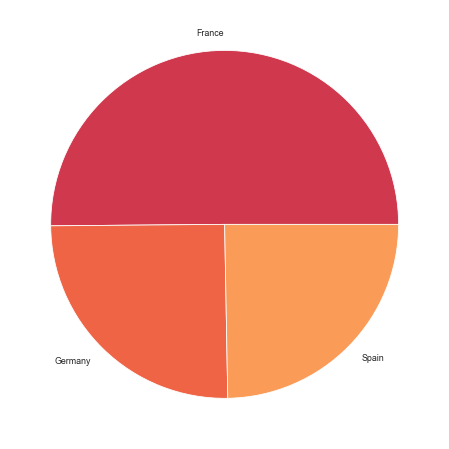

In [52]:
plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index)

#### Gender

In [53]:
gender_counts = df3.gender.value_counts()
gender_counts

Male      5258
Female    4368
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x18f66ac7fd0>,
 [Text(-0.15919475062438182, 1.0884195107464958, 'Male'),
  Text(0.15919464871919167, -1.0884195256513791, 'Female')])

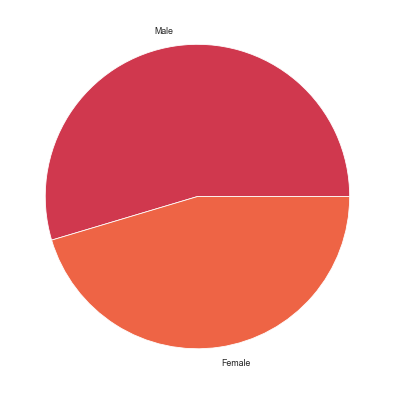

In [54]:
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index)

#### Churn

In [55]:
df3.churn.value_counts()

0    7677
1    1949
Name: churn, dtype: int64

## Bivariant Analysis

#### Country vs Churn

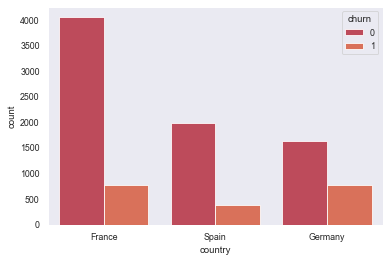

In [57]:
sns.countplot(x="country", hue="churn", data=df3)

The graph shows that Germany has more customer churn, let us calculate the churn percentage.

In [58]:
country_churn_val = df3.groupby(['country', 'churn']).size().unstack().reset_index()
country_churn_val

churn,country,0,1
0,France,4049,777
1,Germany,1640,781
2,Spain,1988,391


In [59]:
country_churn_val['churn_ratio'] = (country_churn_val[1]/country_churn_val[0])*100
country_churn_val

churn,country,0,1,churn_ratio
0,France,4049,777,19.189923
1,Germany,1640,781,47.621951
2,Spain,1988,391,19.668008


We can see that the churn ratio for germany(47.6%) is way more than that of France and Germany

#### Gender vs Churn

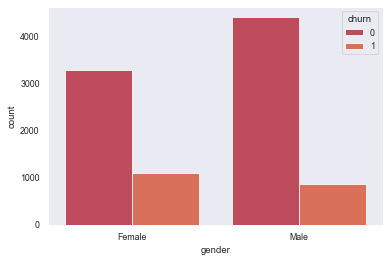

In [60]:
sns.countplot(x="gender", hue='churn', data=df3)

In [61]:
gender_churn_val = df3.groupby(['gender', 'churn']).size().unstack().reset_index()
gender_churn_val

churn,gender,0,1
0,Female,3278,1090
1,Male,4399,859


In [62]:
gender_churn_val['churn_ratio'] = (gender_churn_val[1]/gender_churn_val[0])*100
gender_churn_val

churn,gender,0,1,churn_ratio
0,Female,3278,1090,33.251983
1,Male,4399,859,19.527165


This shows that the churn ratio of females is more than that in males, so more females are moving away from the bank.

#### Age vs Churn

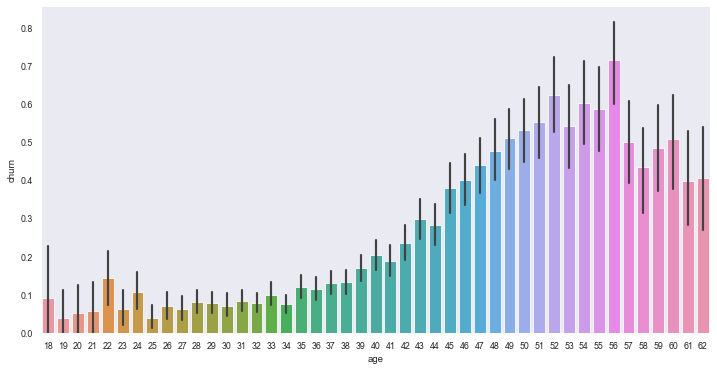

In [63]:
set_size(12,6)
sns.barplot(x='age', y='churn', data=df3)

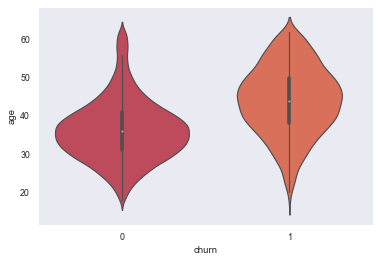

In [66]:
sns.violinplot(x='churn', y='age', data=df3)

The above clearly indicates that, the churn rate is high with ages 45 - 62, while the churn rate is lower with ages 18 - 44.

Credit Score vs Churn

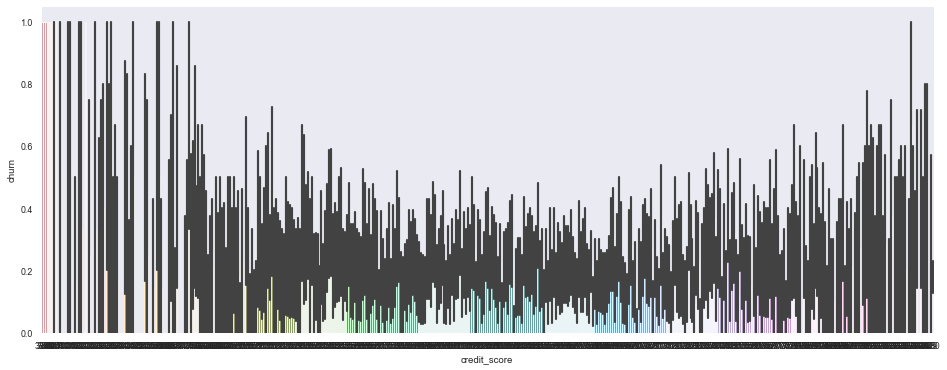

In [93]:
set_size(16,6)
plt.tight_layout()
sns.barplot(x='credit_score', y='churn', data=df3)

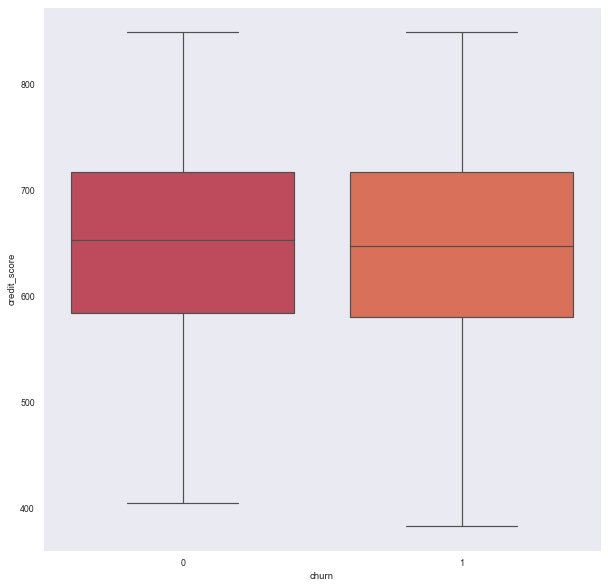

In [80]:
set_size(10,10)
sns.boxplot(x='churn', y='credit_score', data=df3)

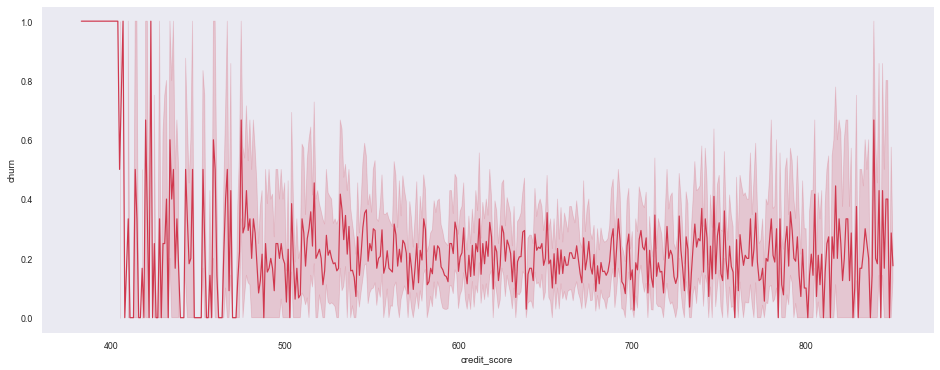

In [79]:
set_size(16,6)
sns.lineplot(x='credit_score', y='churn', data=df3)

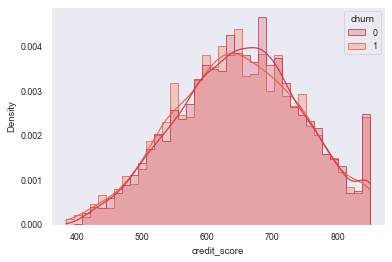

In [87]:
sns.histplot(data=df3, x='credit_score', hue='churn', kde=True, element='step', stat='density', common_norm=False)

We can see that the customers with Low credit score and high credit score have an increase in churn, so this indicates that the regular credit card score customers are less likely to change bank, where as persons with Low credit score and very high credit scores are likely to move away from the bank.

Tenure vs Churn

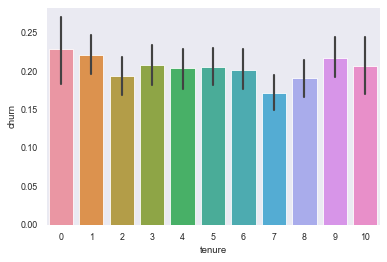

In [89]:
sns.barplot(x='tenure', y='churn', data=df3)

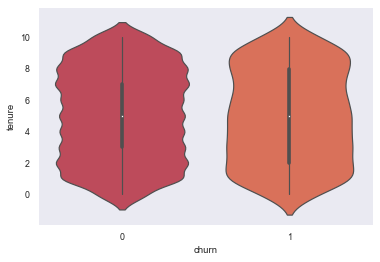

In [90]:
sns.violinplot(x='churn', y='tenure', data=df3)

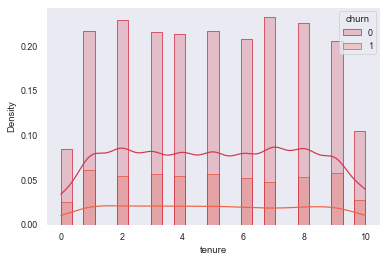

In [91]:
sns.histplot(data=df3, x='tenure', hue='churn', kde=True, element='step', stat='density')

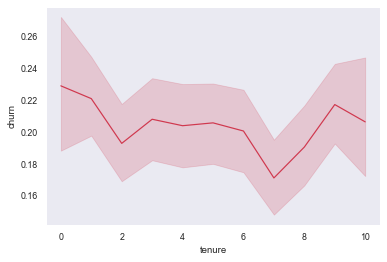

In [110]:
sns.lineplot(x='tenure', y='churn', data=df3)

THis shows that customers with few years with bank or too high years with bank are likely to move away, where as customers with 1 to 8 years with bank are less likely to more away.

Balance vs Churn

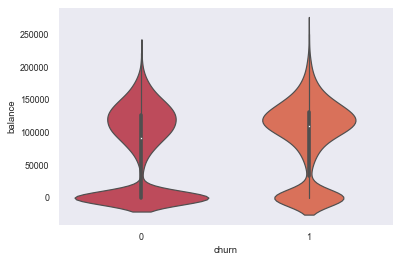

In [95]:
sns.violinplot(x='churn', y='balance', data=df3)

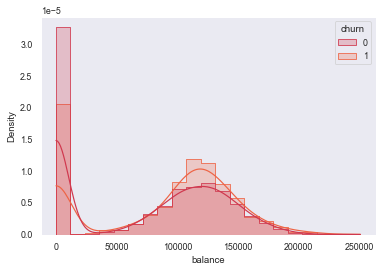

In [193]:
sns.histplot(data=df3, x='balance', hue='churn', kde=True, element='step', stat='density', common_norm=False)

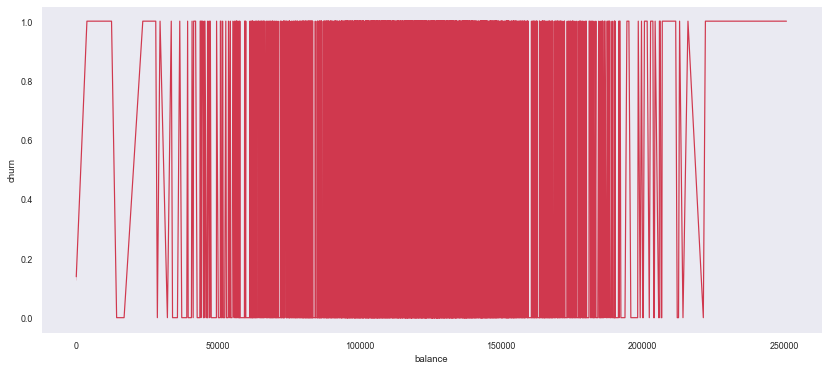

In [113]:
set_size(14, 6)
sns.lineplot(x='balance', y='churn', data=df3)

In [120]:
zero_balance = df3[df3.balance==0]['churn']
zero_balance.value_counts()

0    2998
1     480
Name: churn, dtype: int64

In [142]:
low_balance = df3[df3.balance<=50000]['churn']
low_balance_counts = low_balance.value_counts()

print(low_balance_counts)

print("Percentage of churn with balance <=50000 :", (low_balance_counts.values[1]/low_balance_counts.values[0])*100)

0    3044
1     504
Name: churn, dtype: int64
Percentage of churn with balance <=50000 : 16.557161629434955


In [141]:
high_balance = df3[df3.balance>50000]['churn']
high_balance_counts = high_balance.value_counts()
print(high_balance_counts)

print("Percentage of churn with balance >50000 :", (high_balance_counts[1]/high_balance_counts[0])*100)

0    4633
1    1445
Name: churn, dtype: int64
Percentage of churn with balance >50000 : 31.189294193826893


Customers with low balance tend to stay(<=50000), The churn increases with increase in the balance amount of customer and high bank balance customers are more likely to leave the bank.

Products Number vs Churn

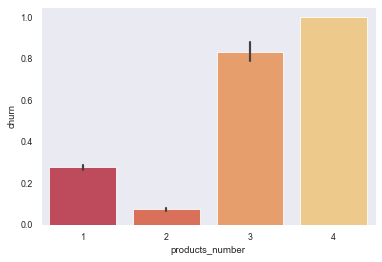

In [144]:
sns.barplot(x='products_number', y='churn', data=df3)

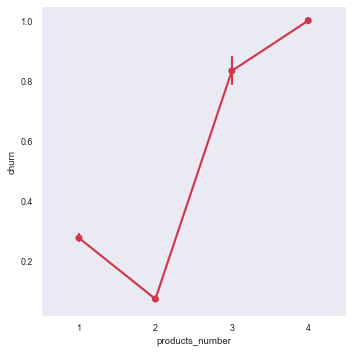

In [153]:
sns.catplot(x='products_number', y='churn', data=df3, kind='point')

In [171]:
product_churn = df3.groupby(['products_number', 'churn']).size().unstack().reset_index().fillna(0)
product_churn['churn_percentage'] = (product_churn[1]/product_churn[0])*100
product_churn

churn,products_number,0,1,churn_percentage
0,1,3529.0,1353.0,38.339473
1,2,4106.0,329.0,8.012664
2,3,42.0,209.0,497.619048
3,4,0.0,58.0,inf


This clearly shows that, customers using products greater than 2 are most likely to move away from bank, No customer using products 4 stays with the bank.

Credit Card vs Churn

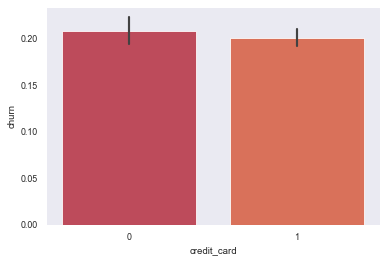

In [172]:
sns.barplot(x='credit_card', y='churn', data=df3)

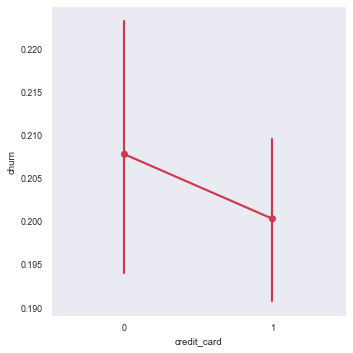

In [176]:
sns.catplot(x='credit_card', y='churn', data=df3, kind='point')

In [179]:
credit_card_churn = df3.groupby(['credit_card', 'churn']).size().unstack().reset_index()
credit_card_churn['churn_percentage'] = (credit_card_churn[1]/credit_card_churn[0])*100
credit_card_churn

churn,credit_card,0,1,churn_percentage
0,0,2250,590,26.222222
1,1,5427,1359,25.041459


This shows that, credit card does have a little effect in customer churn.

Active Member vs Churn

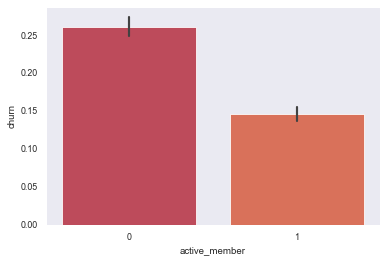

In [182]:
sns.barplot(x='active_member', y='churn', data=df3)

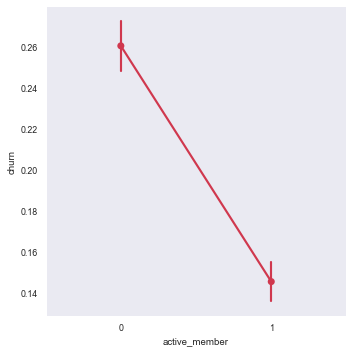

In [184]:
sns.catplot(x='active_member', y='churn', data=df3, kind='point')

In [185]:
active_member_churn = df3.groupby(['active_member', 'churn']).size().unstack().reset_index()
active_member_churn['churn_percentage'] = (active_member_churn[1]/active_member_churn[0])*100
active_member_churn

churn,active_member,0,1,churn_percentage
0,0,3534,1245,35.229202
1,1,4143,704,16.992517


This shows that the active custoer is less likely to leave the bank, where as inactive customers are twice as likely to leave the bank compared to active customers.

Estimated Salary vs Churn

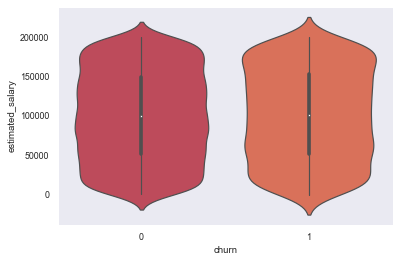

In [189]:
sns.violinplot(y='estimated_salary', x='churn', data=df3)

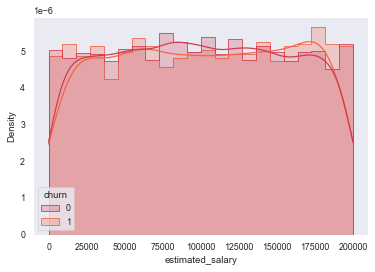

In [192]:
sns.histplot(data=df3, x='estimated_salary', hue='churn', kde=True, element='step', stat='density', common_norm=False)

There is no clear relationship between the estimated_salary and churn of the customer.

### Multivariant Analysis

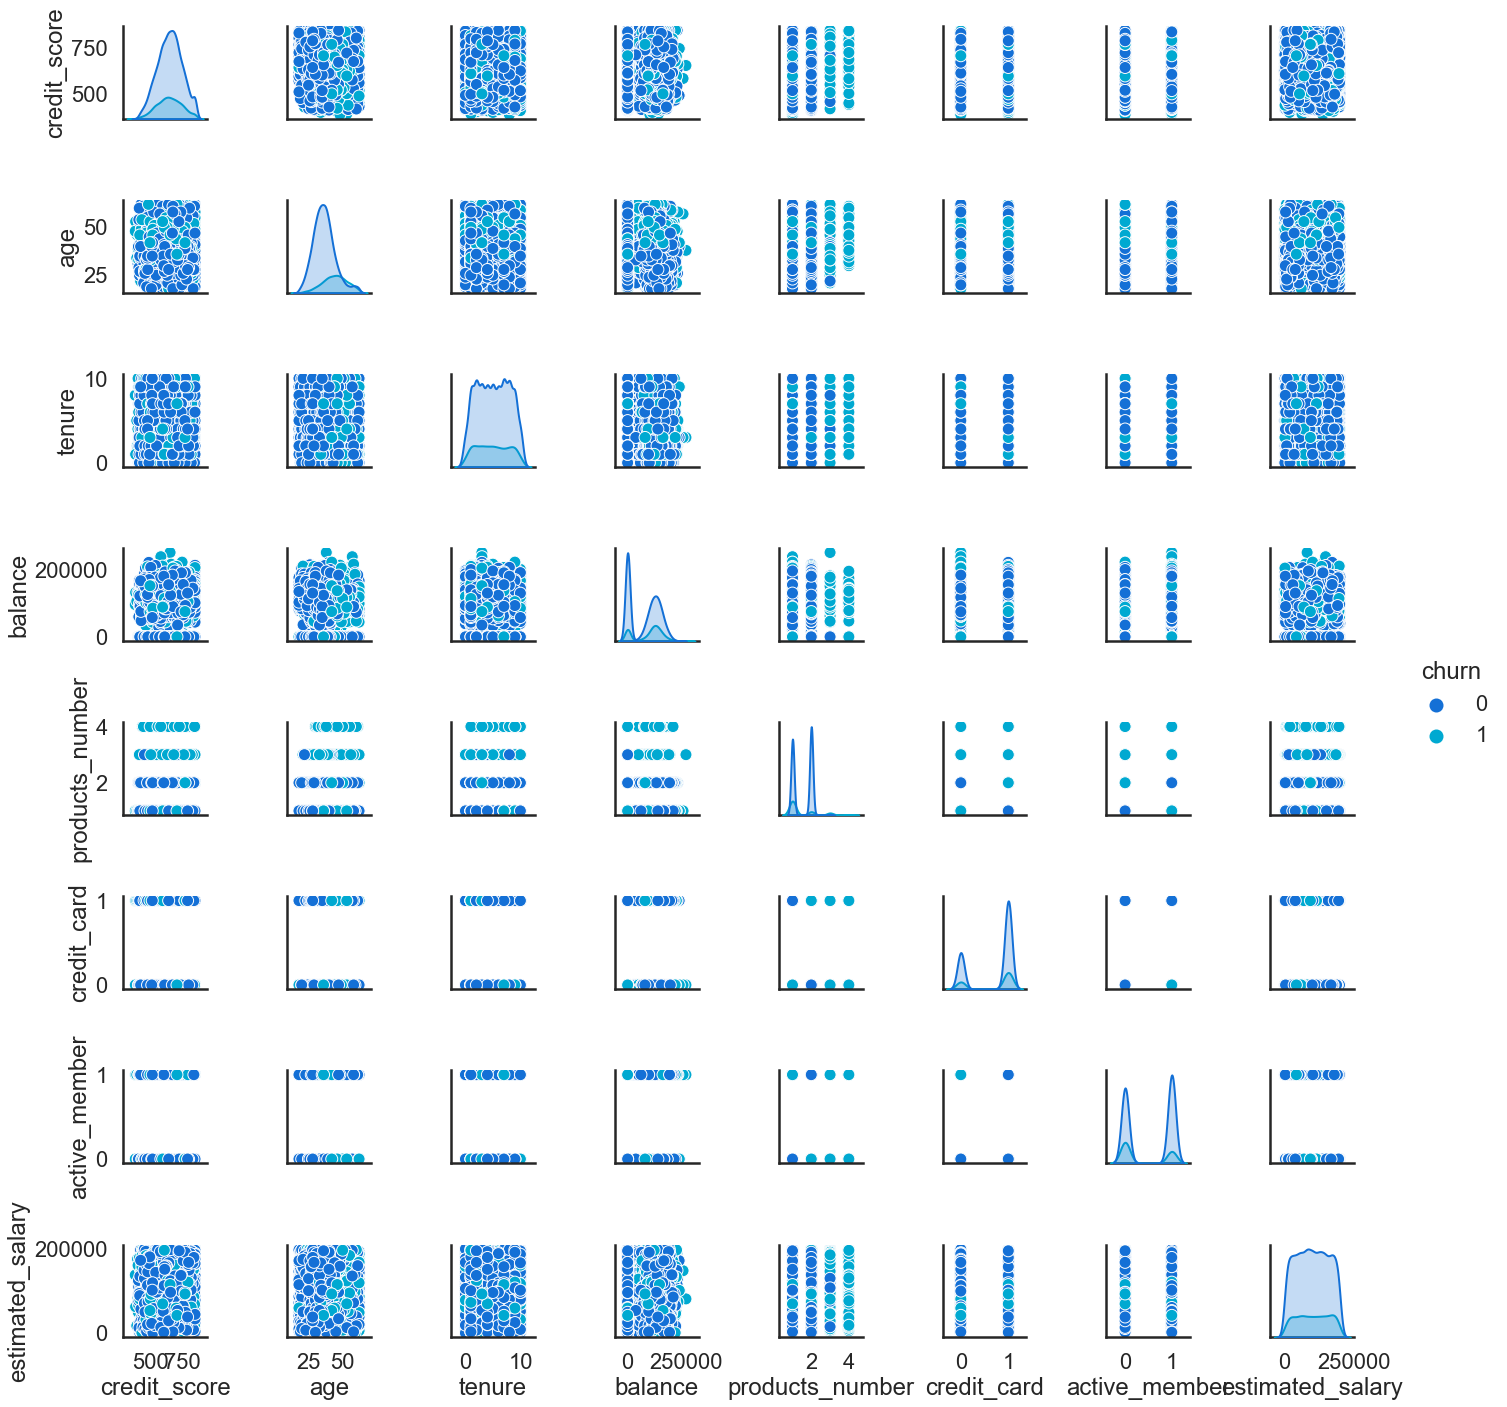

In [202]:
set_context("poster")
set_color('terrain')
sns.pairplot(data=df3, hue='churn')

In [203]:
corr_mat = df3.corr()
corr_mat

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.013055,-0.000798,0.007229,0.011554,-0.000914,0.020416,0.002609,-0.016413
age,-0.013055,1.000000,-0.010576,0.041412,-0.032473,-0.016363,0.017838,-0.005601,0.358494
tenure,-0.000798,-0.010576,1.000000,-0.012925,0.015049,0.019781,-0.027236,0.010031,-0.012872
balance,0.007229,0.041412,-0.012925,1.000000,-0.304347,-0.013795,-0.006958,0.010241,0.116913
products_number,0.011554,-0.032473,0.015049,-0.304347,1.000000,0.002714,0.011250,0.013560,-0.050669
credit_card,-0.000914,-0.016363,0.019781,-0.013795,0.002714,1.000000,-0.012287,-0.010259,-0.008491
active_member,0.020416,0.017838,-0.027236,-0.006958,0.011250,-0.012287,1.000000,-0.010309,-0.143424
estimated_salary,0.002609,-0.005601,0.010031,0.010241,0.013560,-0.010259,-0.010309,1.000000,0.009123
churn,-0.016413,0.358494,-0.012872,0.116913,-0.050669,-0.008491,-0.143424,0.009123,1.000000


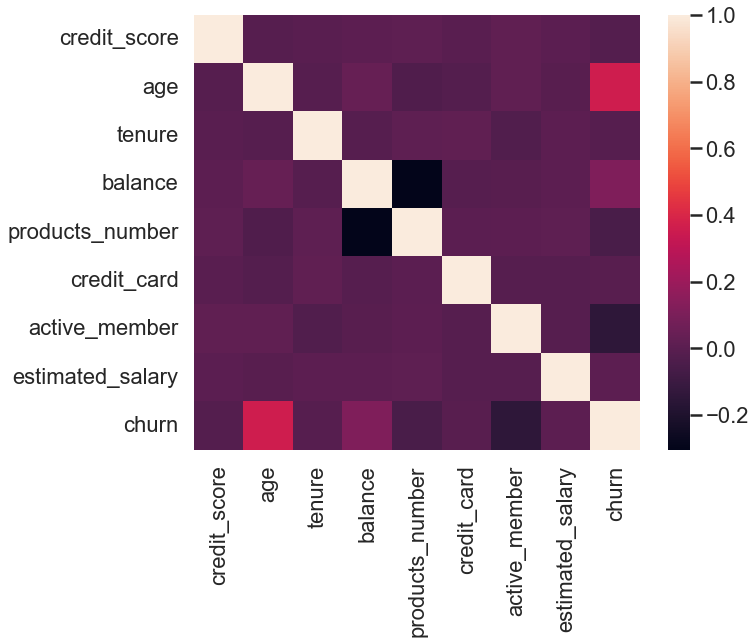

In [211]:
set_size(10,8)
sns.heatmap(corr_mat)

### Data Transformation

Data Transformation is very important before training the model with the data, it converts the categorical variables into numerical variables, that can be better used by the model.

#### One-Hot encoding

In [217]:
df_encoded = pd.get_dummies(df3, columns=['gender', 'country'], drop_first=True)
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [221]:
print("The number of columns before and after encoding are : {}, {}".format(df3.shape[1], df_encoded.shape[1]))

The number of columns before and after encoding are : 11, 12


### Train/Test Split

In [452]:
X = df_encoded.drop(['churn'], axis=1)
y = df_encoded.churn

X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_Male,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [453]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [454]:
print(X_train.shape)
print(X_test.shape)

(6738, 11)
(2888, 11)


### Base Model

#### Logistic Regression Model

In [490]:
# Initialize Regression
log_reg_model = LogisticRegression(C=2.0, penalty='l1', solver='liblinear')

In [491]:
# Train model using all features
log_reg_model.fit(X_train,y_train)

LogisticRegression(C=2.0, penalty='l1', solver='liblinear')

### Model Evaluation

In [492]:
performance_df = pd.DataFrame()

def plot_auc(y_true, y_pred_proba):

    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_true, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(10,10))
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def model_performance(y_test, y_pred):
    
    f1 = metrics.f1_score(y_test, y_pred)
    accu = metrics.accuracy_score(y_test, y_pred)
    recal = metrics.recall_score(y_test, y_pred)
    pre = metrics.precision_score(y_test, y_pred)
    
    plot_auc(y_test, y_pred)
    
    return {'f1' : f1, 'accuracy' : accu, 'recall' : recal, 'precision' : pre}

### Data Prediction

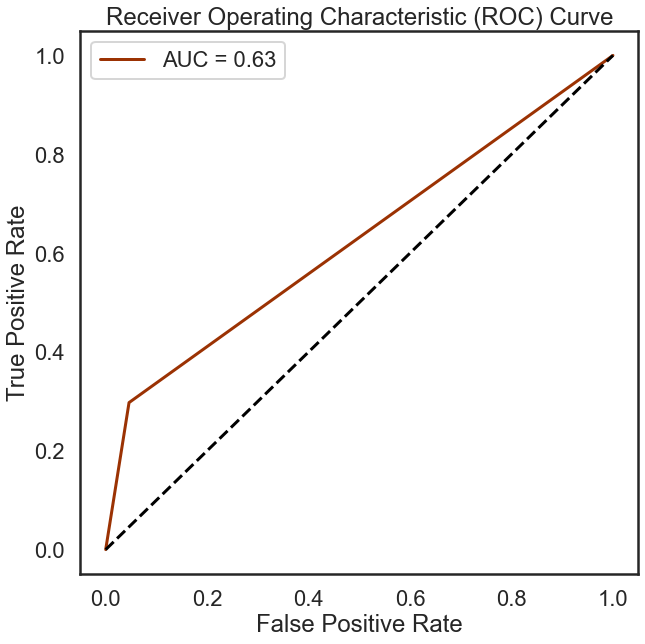

{'f1': 0.4023121387283237,
 'accuracy': 0.820983379501385,
 'recall': 0.29743589743589743,
 'precision': 0.6214285714285714}

In [495]:
preds = log_reg_model.predict(X_test)
base_performance = model_performance(y_test, preds)
base_performance

In [496]:
df_base = pd.DataFrame([base_performance])
performance_df = pd.concat([performance_df, df_base], ignore_index=True)
performance_df

,f1,accuracy,recall,precision
0,0.402312,0.820983,0.297436,0.621429


It is important to check that the features are properly selected before training the model, so let us perform the feature selection and try to check if the model performance improves.

### Feature Selection

#### Variance threshold

In [497]:
X_train_vt, X_test_vt, y_tain_vt, y_test_vt = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [498]:
X_train_vt.var(axis=0)

credit_score        9.215724e+03
age                 7.759933e+01
tenure              8.386348e+00
balance             3.881173e+09
products_number     3.318561e-01
credit_card         2.063646e-01
active_member       2.499884e-01
estimated_salary    3.310064e+09
gender_Male         2.479744e-01
country_Germany     1.859971e-01
country_Spain       1.882309e-01
dtype: float64

In [499]:
scaler = MinMaxScaler()

scaled_X_train_vt = scaler.fit_transform(X_train_vt)

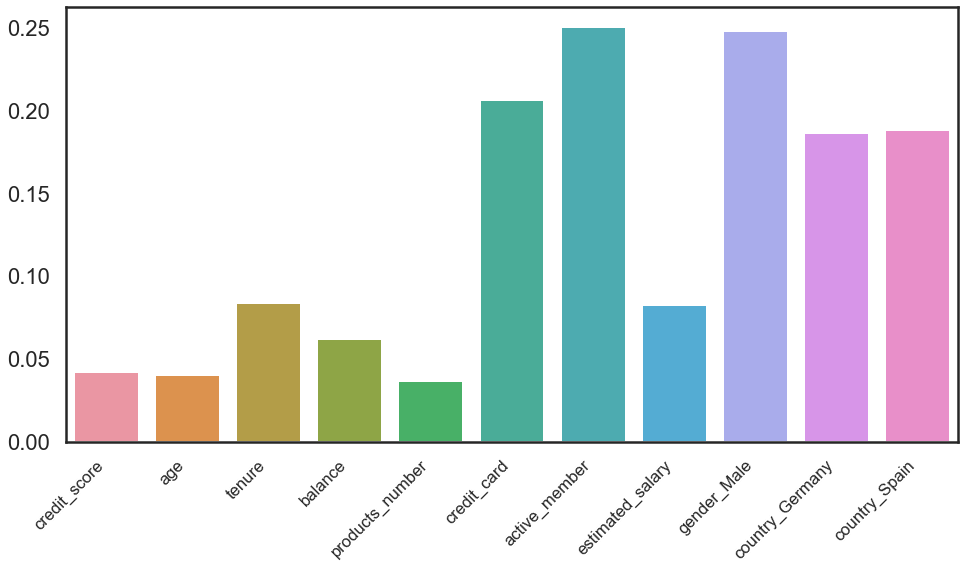

In [500]:
set_size(16,8)
plt.xticks(rotation = 45, ha = 'right', fontsize = 'x-small')
sns.barplot(x=X_train_vt.columns, y=scaled_X_train_vt.var(axis=0))

We can see that products_number has least variance, so let us train our model by removing this column and see if the performance improves

In [501]:
X_train_vt_rem = X_train_vt.drop(['products_number'], axis=1)
X_test_vt_rem = X_test_vt.drop(['products_number'], axis=1)
X_train_vt_rem.shape

(6738, 10)

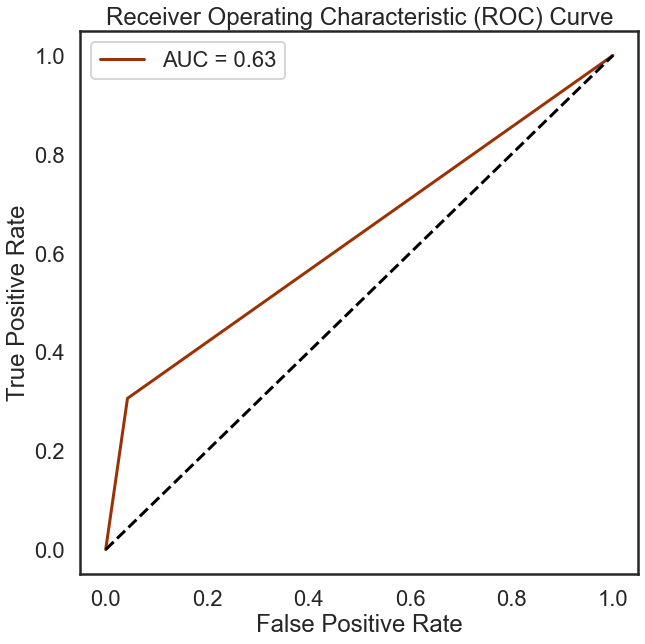

{'f1': 0.4148319814600232,
 'accuracy': 0.8251385041551247,
 'recall': 0.305982905982906,
 'precision': 0.6438848920863309}

In [502]:
log_reg_model.fit(X_train_vt_rem,y_train)

preds = log_reg_model.predict(X_test_vt_rem)
var_thres_performance = model_performance(y_test_vt, preds)
var_thres_performance

In [503]:
var_thres_performance_df = pd.DataFrame([var_thres_performance])
performance_df = pd.concat([performance_df, var_thres_performance_df], ignore_index=True)
performance_df

,f1,accuracy,recall,precision
0,0.402312,0.820983,0.297436,0.621429
1,0.414832,0.825139,0.305983,0.643885


We can see that there is a slight improve in the metrics after using Variance Threshold and removing a feature from the data.

### Mutual Information - K Best Features

In [504]:
X_train_kb, X_test_kb, y_train_kb, y_test_kb = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [505]:
def kbestfeaturesmodel(k_best_features):
    selector = SelectKBest(mutual_infssif, k=k_best_features)
    selector.fit(X_train_kb, y_train_kb)
    
    X_train_kb_mut = selector.transform(X_train_kb)
    X_test_kb_mut = selector.transform(X_test_kb)
    
    log_reg_model.fit(X_train_kb_mut, y_train_kb)
    preds = log_reg_model.predict(X_test_kb_mut)
    
    res = model_performance(y_test_kb, preds)
    return res

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


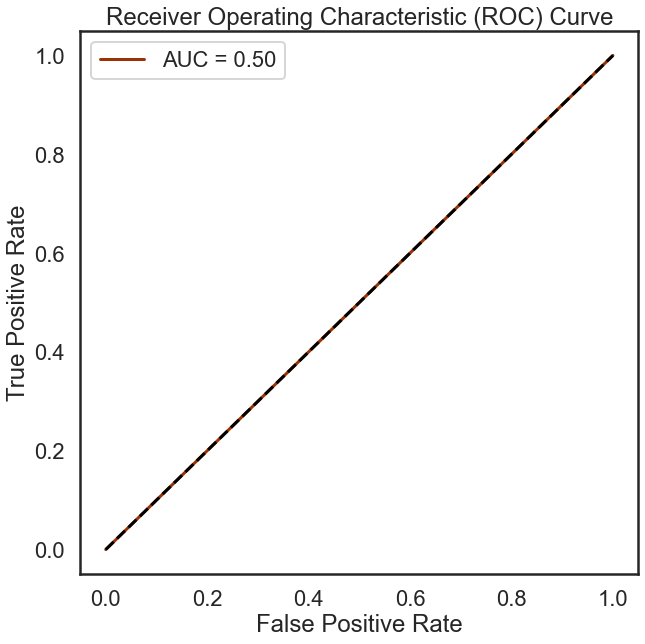

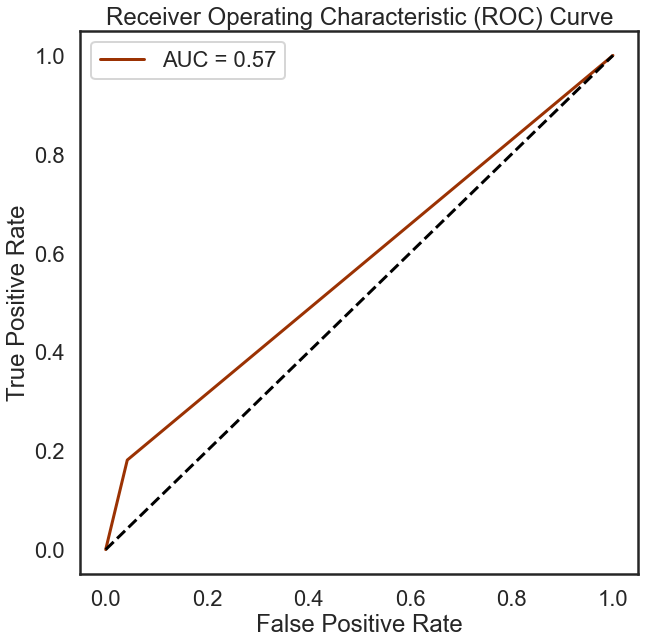

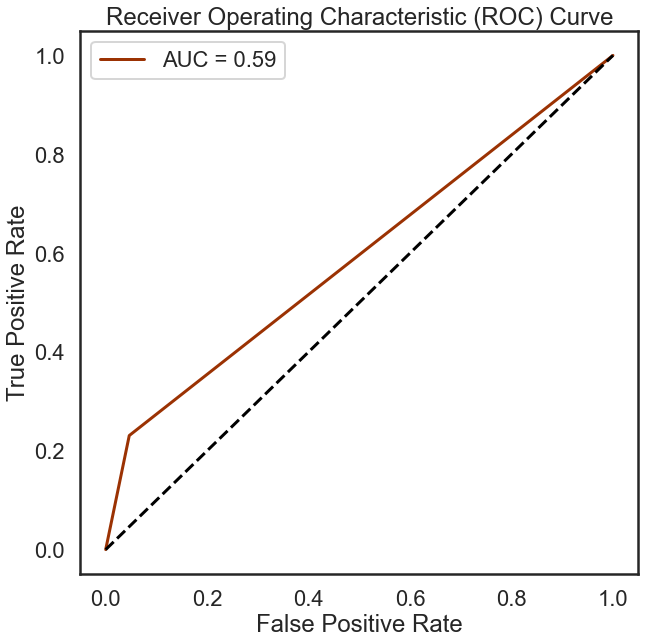

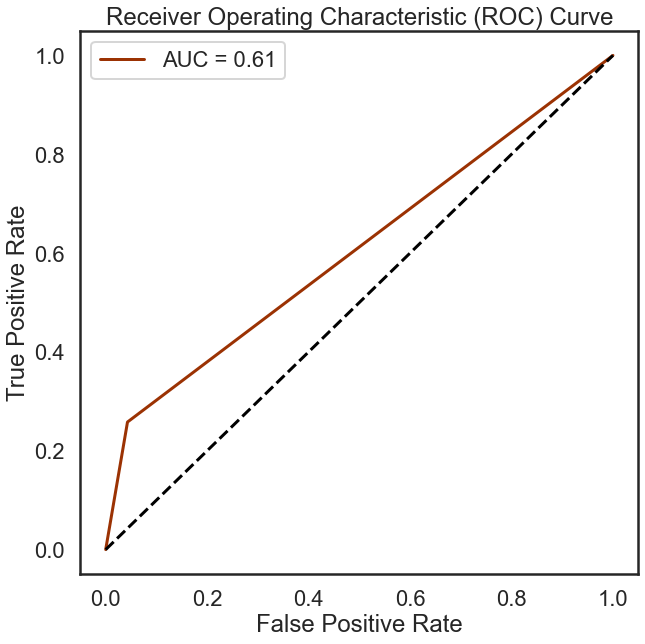

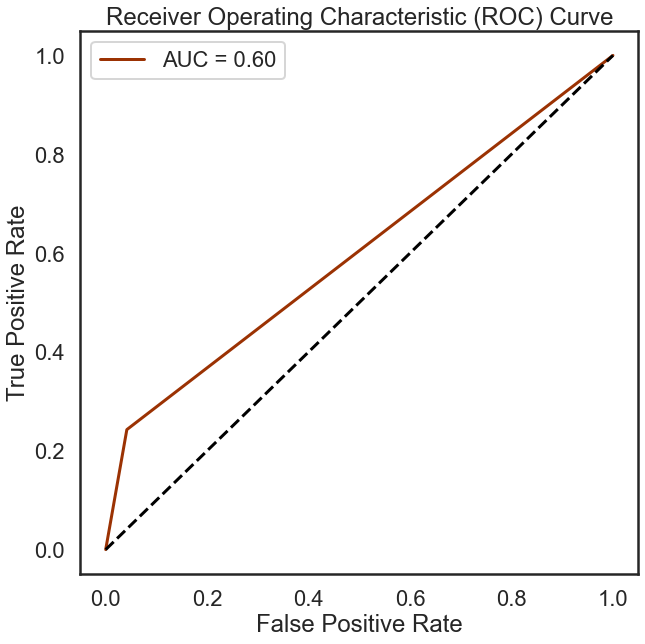

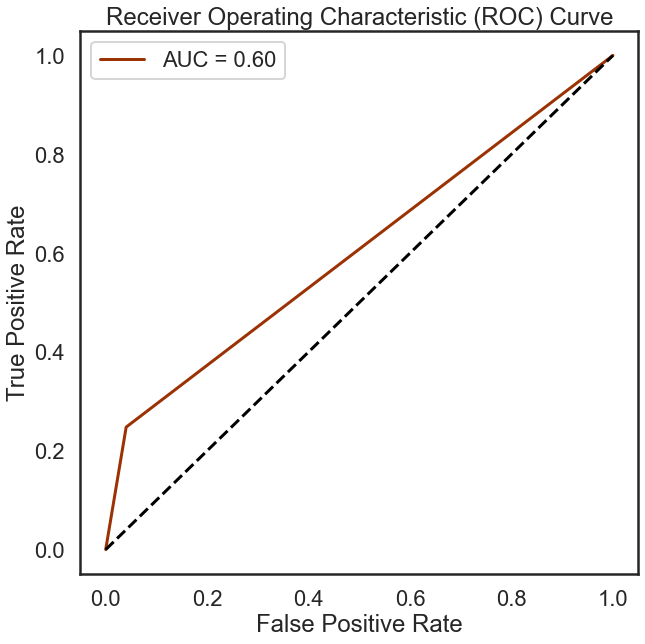

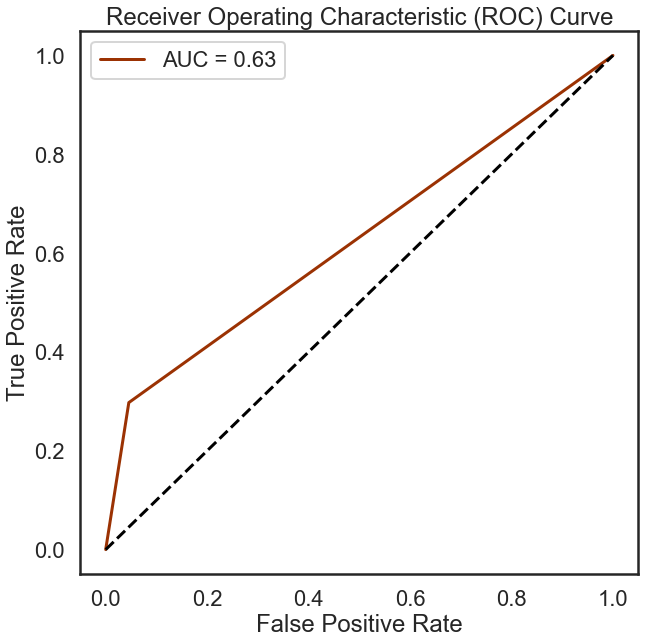

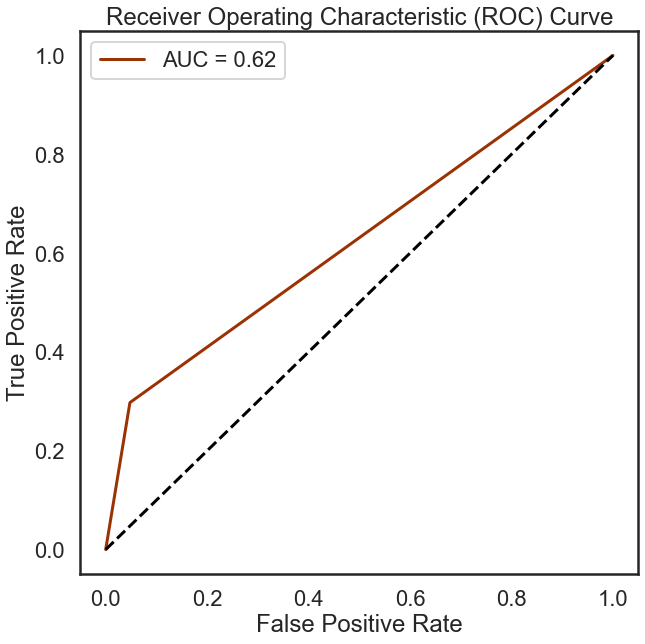

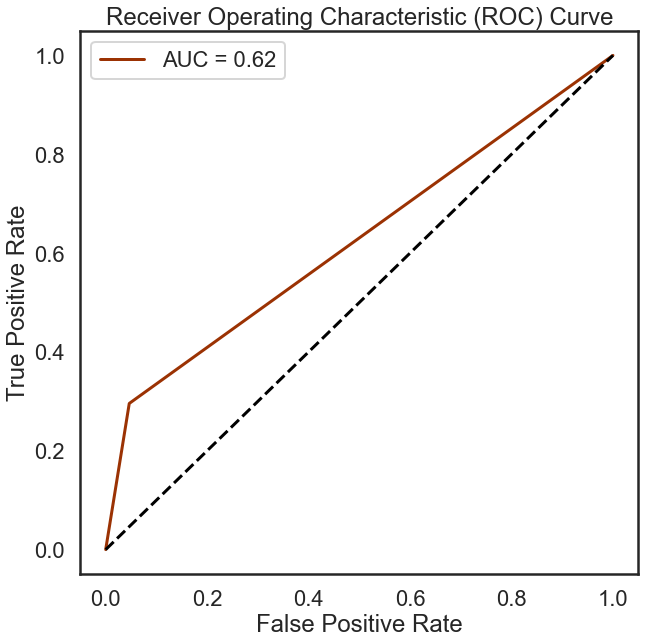

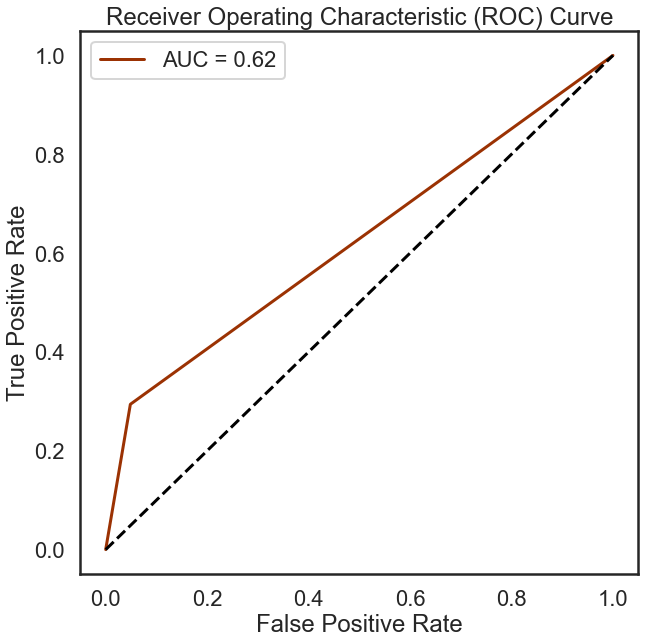

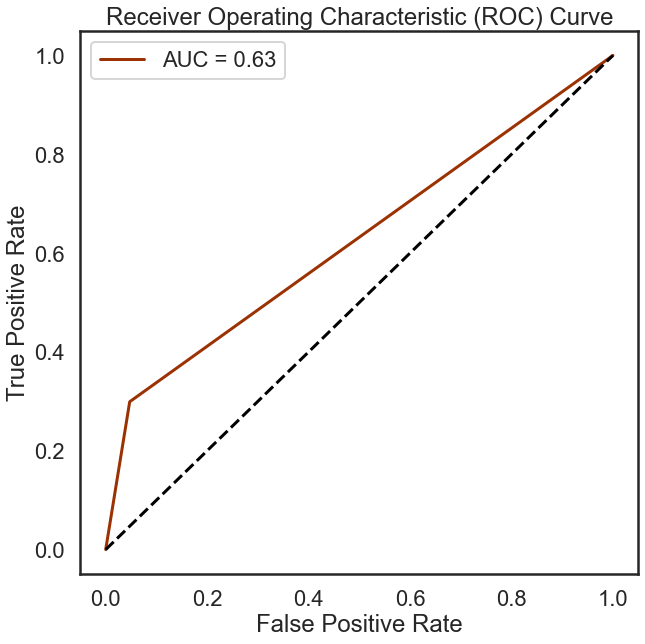

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [506]:
pre_l = []
acc_l = []
f1_l = []
ind = list(range(1, 12))
for k in range(1, 12):
    res = kbestfeaturesmodel(k)
    
    f1_l.append(res['f1'])
    acc_l.append(res['accuracy'])
    pre_l.append(res['precision'])

ind

[0.0, 0.5196078431372549, 0.5578512396694215, 0.604, 0.5966386554621849, 0.6092436974789915, 0.6236559139784946, 0.6126760563380281, 0.6178571428571429, 0.6056338028169014, 0.6161971830985915]


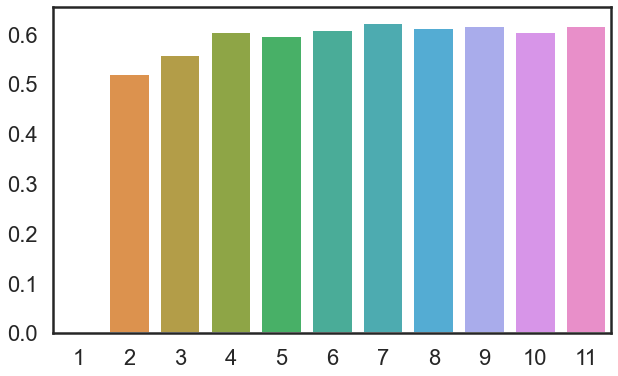

In [507]:
set_size(10, 6)
print(pre_l)
sns.barplot(x=ind, y=pre_l)

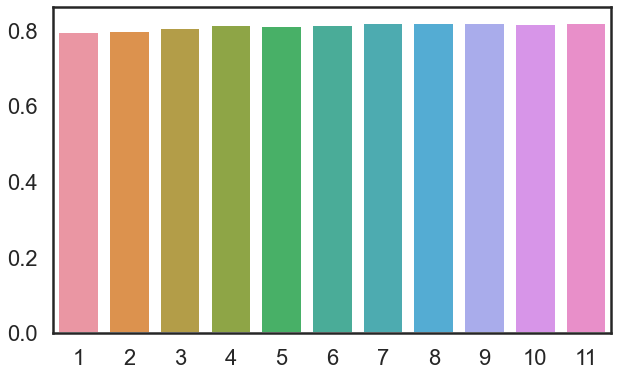

In [508]:
set_size(10, 6)
sns.barplot(x=ind, y=acc_l)

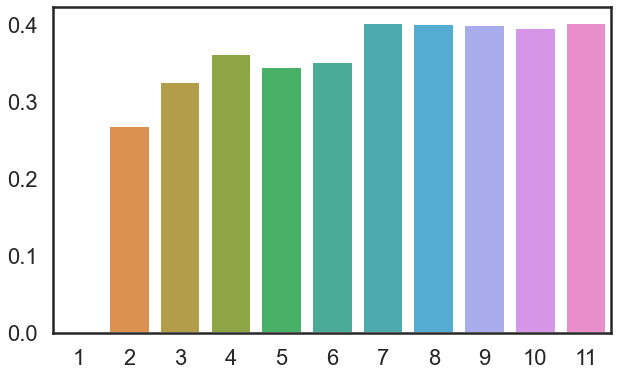

In [509]:
set_size(10, 6)
sns.barplot(x=ind, y=f1_l)

From the above we can clearly see that the model when trained with 4 features performs the best and in every metric, so let us see which 4 columns are best for model training.

In [510]:
selector = SelectKBest(mutual_info_classif, k=7)
selector.fit(X_train_kb, y_train_kb)

feature_mask = selector.get_support()

selected_features = X_train_kb.columns[feature_mask]

selected_features

Index(['credit_score', 'age', 'balance', 'products_number', 'active_member',
       'gender_Male', 'country_Germany'],
      dtype='object')

If we check the Exploratory analysis that we did for these features vs Churn, we can clearly see that they definitely show a pattern of customer churn, hence these features are most important in predicitng the customer churn and improves the mdoel accuracy and performance.

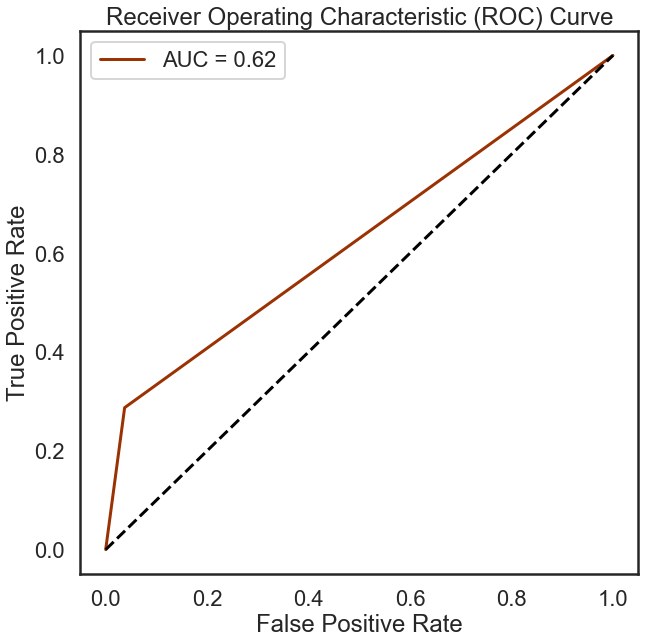

{'f1': 0.40047675804529204,
 'accuracy': 0.8258310249307479,
 'recall': 0.28717948717948716,
 'precision': 0.6614173228346457}

In [511]:
k_best_performance = kbestfeaturesmodel(7)
k_best_performance

In [512]:
k_best_performance_df = pd.DataFrame([k_best_performance])
performance_df = pd.concat([performance_df, k_best_performance_df], ignore_index=True)
performance_df

,f1,accuracy,recall,precision
0,0.402312,0.820983,0.297436,0.621429
1,0.414832,0.825139,0.305983,0.643885
2,0.400477,0.825831,0.287179,0.661417


We can clearly see that the model performance has improved slightly after using Feature Selection techniques, this could be of a very greater impact with bigger dataset, so Feature selectino step is very important incase of improving model performance.

In [517]:
prec_ds = performance_df.precision
prec_ds

0    0.621429
1    0.643885
2    0.661417
Name: precision, dtype: float64

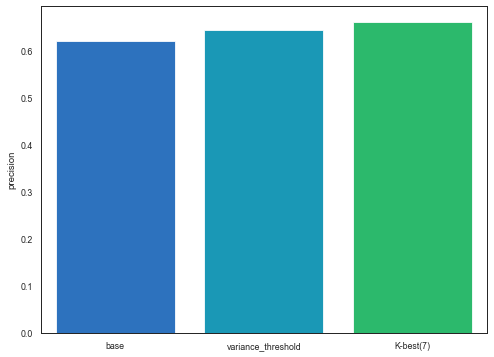

In [523]:
set_color('terrain')
set_size(8,6)
set_context('paper')
sns.barplot(x=['base', 'variance_threshold', 'K-best(7)'], y=prec_ds)

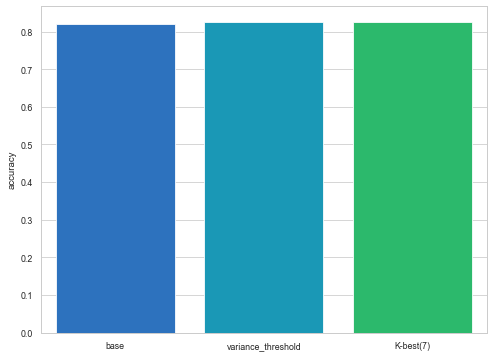

In [549]:
set_color('terrain')
set_size(8,6)
set_context('paper')
sns.barplot(x=['base', 'variance_threshold', 'K-best(7)'], y=performance_df.accuracy)

The Accuracy (82.58%) is more with the K-Best features model, this allowed us to get the best features among the available features.

From the above analysis and model prediction we can see that 'credit_score', 'age', 'balance', 'products_number', 'active_member', 'gender_Male', 'country_Germany' are the most important columns for prediction of the customer churn, based on these features we can decide if customer will leave the bank or is likely to stay with the bank.

From the EDA we can conclude that customers with more age are likely to leave the bank,  
customers with very low and very high credit score are likely to leave the bank,  
custoers with balance >50000 are more likely to leave,  
customer with products 2 are most likely ot stay, on contrary to customers with products 4 will leave the bank,  
an active customer is likely to stay with the bank,  
Males are more likely to stay with the bank compared to females,  
Customer from germany is most likely to leave the bank compared to other countries.